<a href="https://colab.research.google.com/github/martaarozarena/KSchool-Master-Final-Project/blob/master/exog_varaibles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import matplotlib.pyplot as plt


In [108]:
sheets=["c1_schoolclosing","c2_workplaceclosing","c3_cancelpublicevents","c4_restrictionsongatherings","c5_closepublictransport","c6_stayathomerequirements","c7_domestictravel","c8_internationaltravel","h1_publicinfocampaign","h2_testingpolicy","h3_contacttracing"]
initialdate="01-01-2020"
#enddate="30-06-2020"

In [109]:
var = pd.read_excel("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx",sheet_name=sheets)

In [110]:
countries=['Denmark','Germany','Spain', 'Finland', 'Italy', 'Sweden', 'France', 'Norway', 'UK']
for i in var.keys():
  var[i]=var[i].drop("CountryCode",axis=1)
  var[i].index=var[i].CountryName
  var[i]=var[i].drop("CountryName",axis=1)
  var[i]=var[i][:-3]
  var[i]=var[i].T
  var[i]=var[i].loc[:,var[i].columns.str.contains('Denmark|Germany|Spain|Finland|Italy|Sweden|France|Norway|United Kingdom' \
                                                  '|United States|Canada|Mexico' \
                                                  '|Australia|Indonesia|Malaysia|Philippines|Thailand|Hong Kong|Vietnam|China|India|Japan|Singapore|Taiwan' \
                                                  '|Saudi Arabia|United Arab Emirates', regex=True)]
  var[i].index=pd.to_datetime(var[i].index,format="%d%b%Y")
#  var[i]=var[i].truncate(initialdate,enddate)

In [111]:
b=1
for i in sheets:
  if b==1: 
    var[i].columns="{}_".format(i[3:])+var[i].columns
    exogenas=var[i]
  else:
    concat=var[i]
    concat.columns="{}_".format(i[3:])+var[i].columns
    exogenas=pd.concat([exogenas,concat],axis=1)
  b=b+1

In [112]:
exogenas.shape

(229, 286)

In [ ]:
#download the mask wearing data

In [ ]:
url2 = "https://drive.google.com/file/d/1vbPOY0hF-Dox_HONp-brgf36TST2vs49/view?usp=sharing"
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
var_percent_mask = pd.read_csv(path2,sep=";")

In [ ]:
var_percent_mask.DateTime=pd.to_datetime(var_percent_mask.DateTime)
var_percent_mask.index=var_percent_mask.DateTime
var_percent_mask.drop("DateTime",axis=1,inplace=True)

In [ ]:
#add the missing dates
var_percent_mask=var_percent_mask.resample("D").mean()

In [ ]:
#fill the missing dates with an interpolation
var_percent_mask.interpolate(method='linear',inplace=True)
var_percent_mask.fillna(method="bfill",inplace=True)

In [ ]:
#rename the variable to be added in the general dataframe and choose the dates
var_percent_mask.columns="mask_"+var_percent_mask.columns
#var_percent_mask=var_percent_mask.truncate(initialdate,enddate)

In [ ]:
#added to the generales dataframe and the missing initial values add 0s cause people was not wearing masks at the beggining
exogenas=pd.concat([exogenas,var_percent_mask],axis=1)
exogenas.fillna(0,inplace=True)

In [ ]:
#flights per day
#url3 = "https://drive.google.com/file/d/1jLzSGGbQY8OyD1YTNZAJFRmvxy7lA2V_/view?usp=sharing"
#path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
url3 = 'https://ansperformance.eu/download/xls/Airport_Traffic.xlsx'
flights = pd.read_excel(url3, sheet_name="DATA", date_parser="FLT_DATE", index_col ="FLT_DATE")

In [ ]:
flights["STATE_NAME"].unique()

array(['Belgium', 'Germany', 'Estonia', 'Finland', 'United Kingdom',
       'Netherlands', 'Ireland', 'Denmark', 'Luxembourg', 'Norway',
       'Poland', 'Sweden', 'Latvia', 'Lithuania', 'Spain', 'Albania',
       'Bulgaria', 'Cyprus', 'Croatia', 'France', 'Greece', 'Hungary',
       'Italy', 'Slovenia', 'Czech Republic', 'Malta', 'Austria',
       'Portugal', 'Bosnia and Herzegovina', 'Romania', 'Switzerland',
       'Turkey', 'Moldova', 'The former Yugoslav Republic of Macedonia',
       'Serbia', 'Montenegro', 'Slovakia', 'Armenia', 'Georgia',
       'Ukraine', 'Morocco', 'Israel', 'Republic of North Macedonia',
       'North Macedonia'], dtype=object)

In [ ]:
for i in flights["STATE_NAME"].unique():
  flights_country=flights[flights["STATE_NAME"]==i]
  flights_country=flights_country.resample("1D").sum()
  flights_country_arr=flights_country['FLT_ARR_1'].truncate(before=initialdate)
  flights_country_arr.rename("FlightsArr_{}".format(i),inplace=True)
  exogenas=pd.concat([exogenas,flights_country_arr],axis=1)

In [ ]:
#creating the csv file
exogenas.to_csv('./data/exogenas.csv')

In [ ]:
exogenas.loc[:, exogenas.columns.str.contains('mask')]

,mask_Denmark,mask_Finland,mask_France,mask_Germany,mask_Italy,mask_Norway,mask_Spain,mask_Sweden,mask_UK
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-08-09,4.0,7.0,84.0,65.0,81.0,5.0,89.0,6.0,69.0
2020-08-10,4.0,7.0,84.0,65.0,81.0,5.0,89.0,6.0,71.0
2020-08-11,4.0,7.0,84.0,65.0,81.0,5.0,89.0,6.0,73.0
2020-08-12,4.0,7.0,84.0,65.0,81.0,5.0,89.0,6.0,75.0


In [ ]:
exogenas2=exogenas.copy()

In [ ]:
covid=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",parse_dates=["date"],index_col="date")

In [ ]:
for i in covid["location"].unique():
  covid_country=covid[covid["location"]==i]
  covid_country_positive_rate=covid_country['positive_rate']
  covid_country_positive_rate.rename("Positive_rate_{}".format(i),inplace=True)
  exogenas2=pd.concat([exogenas2,covid_country_positive_rate],axis=1)


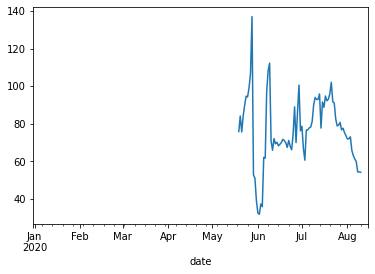

In [ ]:
covid[covid.location=="France"].tests_per_case.plot()